In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Nutrient Composition Dataset.csv')

In [4]:
df.head()

,S.No,Protein,Fat,vitaminC,Fibre,Product
0,1,0.452369,1.170926,1.079271,1.702960,"Amaranth leaves, cooked, boiled, drained, with..."
1,2,2.321087,0.706856,0.350088,0.658249,Bacon and beef sticks
2,3,0.884554,1.186571,2.428544,1.984562,"Apples, frozen, unsweetened, unheated (Include..."
3,4,0.715501,0.577599,0.270925,0.369266,"Alcoholic beverage, beer, light, BUD LIGHT"
4,5,0.132610,0.544521,0.116884,0.557309,"Alcoholic beverage, daiquiri, canned"


In [5]:
df1 = df.iloc[:,1:5]
df1.head()

,Protein,Fat,vitaminC,Fibre
0,0.452369,1.170926,1.079271,1.702960
1,2.321087,0.706856,0.350088,0.658249
2,0.884554,1.186571,2.428544,1.984562
3,0.715501,0.577599,0.270925,0.369266
4,0.132610,0.544521,0.116884,0.557309


In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [7]:
wardlink = linkage(df1, method='ward')

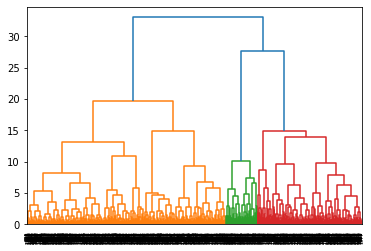

In [9]:
dend = dendrogram(wardlink)

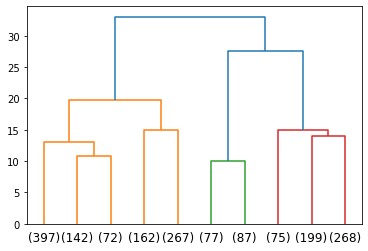

In [10]:
dend = dendrogram(wardlink, truncate_mode='lastp', p=10)

In [11]:
from scipy.cluster.hierarchy import fcluster

In [12]:
#method 1
clusters = fcluster(wardlink, 3,criterion='maxclust')
clusters

array([1, 1, 2, ..., 1, 1, 3], dtype=int32)

In [13]:
#method 2
clusters = fcluster(wardlink, 22,criterion='distance')
clusters

array([1, 1, 2, ..., 1, 1, 3], dtype=int32)

In [14]:
df['clusters'] = clusters
df.head()

,S.No,Protein,Fat,vitaminC,Fibre,Product,clusters
0,1,0.452369,1.170926,1.079271,1.702960,"Amaranth leaves, cooked, boiled, drained, with...",1
1,2,2.321087,0.706856,0.350088,0.658249,Bacon and beef sticks,1
2,3,0.884554,1.186571,2.428544,1.984562,"Apples, frozen, unsweetened, unheated (Include...",2
3,4,0.715501,0.577599,0.270925,0.369266,"Alcoholic beverage, beer, light, BUD LIGHT",1
4,5,0.132610,0.544521,0.116884,0.557309,"Alcoholic beverage, daiquiri, canned",1


In [15]:
df.to_csv('Nutrient Composition Dataset_hierarchical.csv')